In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import load_model
from joblib import load

1. DATA OVERVIEW

In [54]:
import pandas as pd

# Load dataset correctly
heart_data = pd.read_csv("/content/heart disease.csv")

# Check if the data is loaded correctly
heart_data.head(10) # Display first few rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [55]:
print(heart_data.info())  # Check data types and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


2.DATA PREPROCESSING PIPELINE

In [56]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [57]:
# Define ColumnTransformer (same as training)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical features
    ]
)


3. SEPARATE TARGET COLUMN(Y) FROM FEATURES(X)

In [58]:
# If it's a string, reload it correctly
if isinstance(heart_data, str):
    heart_data = pd.read_csv("../content/heart 1000 rows.csv")

# Now, try dropping the target column
heart_data_no_target = heart_data.drop(columns=['target'])
print(heart_data_no_target.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  


3. DEFINE INPUT(X) AND OUTPUT(Y)

In [62]:
import pandas as pd

# Load dataset
heart_data = pd.read_csv("/content/heart disease.csv")

# Define input (X) and output (y)
X = heart_data.drop(columns=['target'])  # All features except 'target'
y = heart_data['target']  # Target column

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

In [63]:
from joblib import dump
dump(preprocessor, 'preprocessor.pkl')  # Save it for later


['preprocessor.pkl']

4.SPLIT DATA INTO TRAINING AND TESTING THE DATA

In [64]:

from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)


5. DEFINE,TRAIN,COMPILE COMPLEX NEURAL NETWORK MODEL

In [65]:
# Cell 16: Confusion Matrices for Neural Network and Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Dictionary to store predictions
predictions = {}
# 1. Neural Network
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])



In [66]:
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [67]:
# Train the model and store history
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
                       callbacks=[early_stopping], verbose=0)

In [68]:
# Evaluate on test set
test_loss, nn_test_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
y_pred_nn = (nn_model.predict(X_test, verbose=0) > 0.5).astype(int).flatten()
predictions['Neural Network'] = y_pred_nn
print(f"Neural Network Accuracy: {nn_test_accuracy * 100:.2f}%")

Neural Network Accuracy: 100.00%


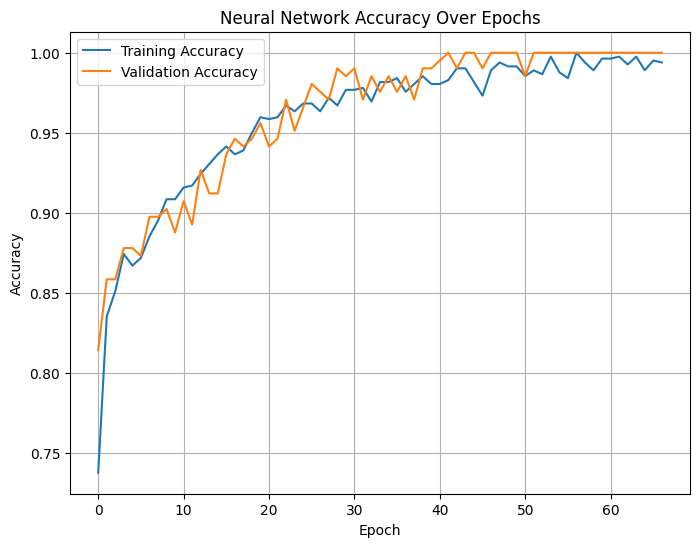

In [69]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#1f77b4')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#ff7f0e')
plt.title('Neural Network Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
predictions['Random Forest'] = y_pred_rf
print(f"Random Forest Accuracy: {rf_test_accuracy * 100:.2f}%")

Random Forest Accuracy: 100.00%


In [71]:
# Random Forest Cross-Validation
cv_scores = cross_val_score(rf_model, X_processed, y, cv=5)
print(f"Random Forest Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%")

Random Forest Cross-Validation Accuracy: 99.41% ± 0.72%



Confusion Matrices:

Neural Network Confusion Matrix:
[[100   0]
 [  0 105]]


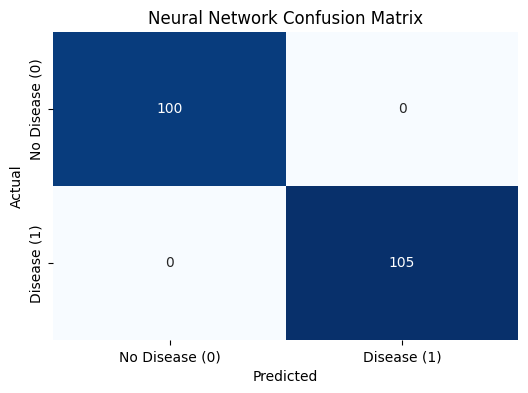


Random Forest Confusion Matrix:
[[100   0]
 [  0 105]]


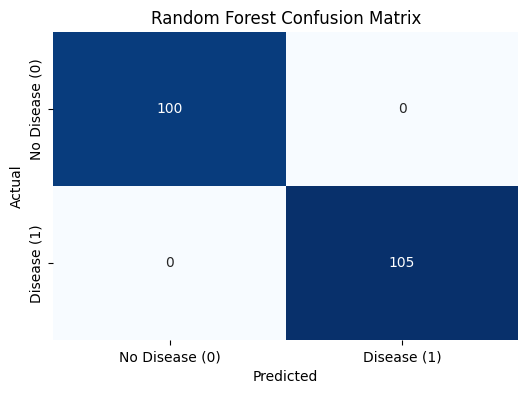

In [72]:
# Confusion Matrices
print("\nConfusion Matrices:")
for model_name in ['Neural Network', 'Random Forest']:
    y_pred = predictions[model_name]
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{model_name} Confusion Matrix:\n{cm}")
    # Visualize with heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Disease (0)', 'Disease (1)'],
                yticklabels=['No Disease (0)', 'Disease (1)'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [73]:
# Cell 17: Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [74]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate on test set
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%")

Logistic Regression Accuracy: 84.88%


In [75]:
# Perform 5-fold cross-validation
log_reg_cv_scores = cross_val_score(log_reg, X_processed, y, cv=5)
print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_cv_scores.mean() * 100:.2f}% ± {log_reg_cv_scores.std() * 100:.2f}%")

Logistic Regression Cross-Validation Accuracy: 84.29% ± 2.42%



Logistic Regression Confusion Matrix:
[[78 22]
 [ 9 96]]


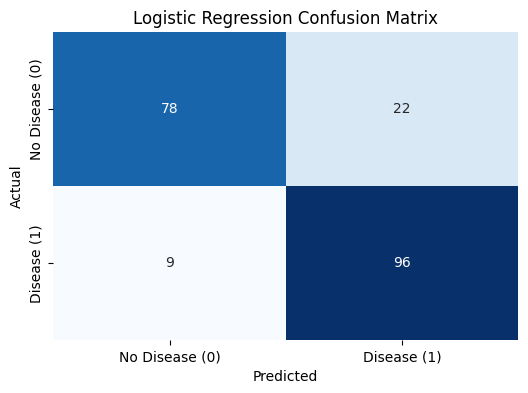

In [76]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix # Import confusion_matrix
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(f"\nLogistic Regression Confusion Matrix:\n{cm_log_reg}")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [77]:
from sklearn.svm import SVC

# Initialize and train SVM model
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Predict and evaluate on test set
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

SVM Accuracy: 91.71%


In [78]:
# Perform 5-fold cross-validation
svm_cv_scores = cross_val_score(svm_model, X_processed, y, cv=5)
print(f"SVM Cross-Validation Accuracy: {svm_cv_scores.mean() * 100:.2f}% ± {svm_cv_scores.std() * 100:.2f}%")

SVM Cross-Validation Accuracy: 91.80% ± 1.78%



SVM Confusion Matrix:
[[ 88  12]
 [  5 100]]


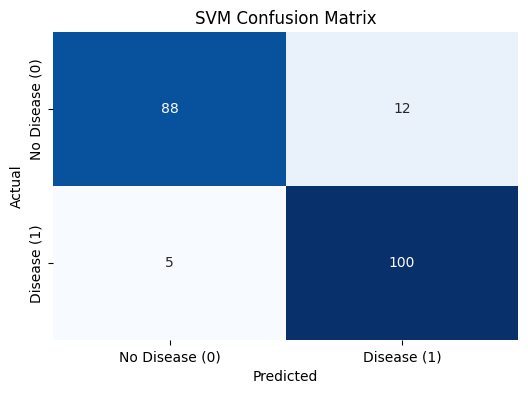

In [79]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(f"\nSVM Confusion Matrix:\n{cm_svm}")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
# Cell 19: Gradient Boosting Classifier (XGBoost)
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(n_estimators=200, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate on test set
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

XGBoost Accuracy: 100.00%


In [81]:
# Perform 5-fold cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X_processed, y, cv=5)
print(f"XGBoost Cross-Validation Accuracy: {xgb_cv_scores.mean() * 100:.2f}% ± {xgb_cv_scores.std() * 100:.2f}%")

XGBoost Cross-Validation Accuracy: 98.73% ± 1.14%



XGBoost Confusion Matrix:
[[100   0]
 [  0 105]]


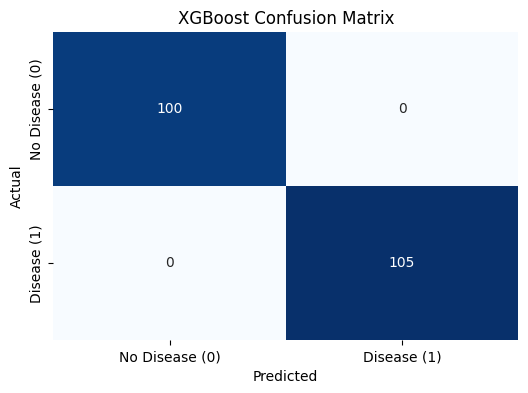

In [82]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"\nXGBoost Confusion Matrix:\n{cm_xgb}")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease (0)', 'Disease (1)'],
            yticklabels=['No Disease (0)', 'Disease (1)'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [83]:
model_accuracies = {
    'Neural Network': test_accuracy * 100,
    'Random Forest': rf_accuracy * 100,
    'Logistic Regression': log_reg_accuracy * 100,
    'SVM': svm_accuracy * 100,
    'XGBoost': xgb_accuracy * 100
}

In [84]:
# Print comparison
print("\nModel Comparison (Test Accuracy):")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.2f}%")


Model Comparison (Test Accuracy):
Neural Network: 100.00%
Random Forest: 100.00%
Logistic Regression: 84.88%
SVM: 91.71%
XGBoost: 100.00%



Confusion Matrices:

Neural Network Confusion Matrix:
[[100   0]
 [  0 105]]


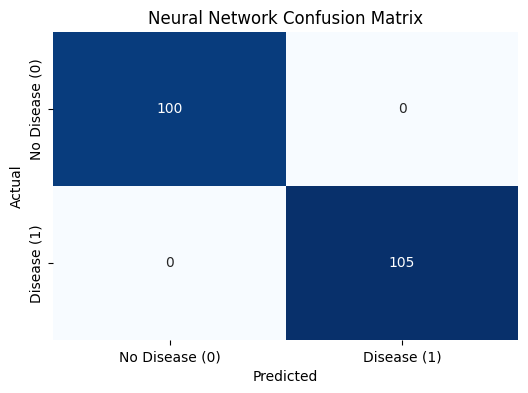


Random Forest Confusion Matrix:
[[100   0]
 [  0 105]]


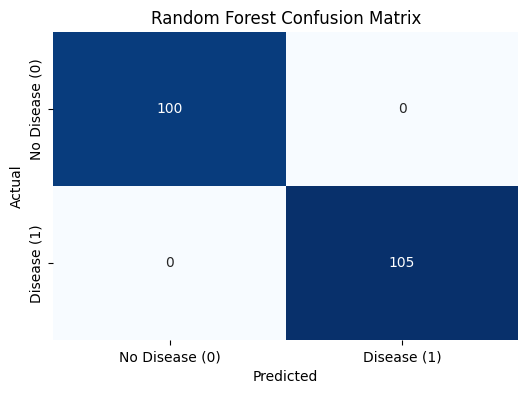

In [85]:
# Confusion Matrices
print("\nConfusion Matrices:")
for model_name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{model_name} Confusion Matrix:")
    print(cm)
    # Visualize with heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Disease (0)', 'Disease (1)'],
                yticklabels=['No Disease (0)', 'Disease (1)'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

8. SAVE TRAINED HEART DISEASE MODEL

In [88]:
# Save the model
dump(rf_model, "best_heart_disease_model.pkl")


['best_heart_disease_model.pkl']

10.  DISEASE CLASS PREDICTION

In [89]:
import pandas as pd
from joblib import load

# Load the saved Random Forest model
model = load("best_heart_disease_model.pkl")

# Load the saved preprocessor
preprocessor = load("preprocessor.pkl")

# Define new patient data (same as your example)
new_input = pd.DataFrame([[58,0,0,100,248,0,0,122,0	,1.0,	1,0,2	]],
                         columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                                  'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

# Preprocess new input
new_input_processed = preprocessor.transform(new_input)

# Make prediction
prediction = model.predict(new_input_processed)[0]

# Interpret result
result = "Disease" if prediction == 1 else "No Disease"
print(f"Prediction for new patient: {result} (Class: {prediction})")



Prediction for new patient: Disease (Class: 1)
